In [8]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

### Data Acquisition

Dataset: https://www.kaggle.com/code/jeyasrisenthil/milk-quality-prediction/data

In [2]:
data = pd.read_csv('milknew.csv')
data.head(10)

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium
5,6.6,37,1,1,1,1,255,high
6,5.5,45,1,0,1,1,250,low
7,4.5,60,0,1,1,1,250,low
8,8.1,66,1,0,1,1,255,low
9,6.7,45,1,1,0,0,247,medium


Keterangan Dataset:

pH = PH susu yang berkisar antara 3 hingga 9,5.

Temprature = Temprature susu yang berkisar dari 34'C hingga 90'C

Taste = Taste susu yang merupakan data kategoris 0 (Buruk) atau 1 (Baik)

Odor = Bau susu yang merupakan data kategoris 0 (Buruk) atau 1 (Baik)

Fat = Bau susu yang merupakan data kategoris 0 (Rendah) atau 1 (Tinggi)

Turbidity = Kekeruhan susu yang merupakan data kategoris 0 (Rendah) atau 1 (Tinggi)

Colour = Warna susu yang berkisar antara 240 hingga 255

Grade = Grade (Target) susu yang merupakan data kategoris Dimana Rendah, Sedang atau Tinggi

### Data Exploration

In [3]:
data.shape

(1059, 8)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [5]:
data.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


In [6]:
data.isnull().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

In [7]:
data['pH'].value_counts()

6.8    249
6.5    189
6.6    159
6.7     82
3.0     70
9.0     61
8.6     40
7.4     39
4.5     37
9.5     24
8.1     24
5.5     23
8.5     22
4.7     20
5.6     19
6.4      1
Name: pH, dtype: int64

In [10]:
data['Temprature'].value_counts()

45    219
38    179
40    132
37     83
43     77
36     66
50     58
55     48
34     40
41     30
66     24
35     23
70     22
65     22
60     18
90     17
42      1
Name: Temprature, dtype: int64

In [11]:
data['Taste'].value_counts()

1    579
0    480
Name: Taste, dtype: int64

In [13]:
data['Fat '].value_counts()

1    711
0    348
Name: Fat , dtype: int64

In [14]:
data['Colour'].value_counts()

255    628
250    146
245    115
247     48
246     44
240     32
248     23
253     22
254      1
Name: Colour, dtype: int64

In [15]:
data['Grade'].value_counts()

low       429
medium    374
high      256
Name: Grade, dtype: int64

In [16]:
data.corr()

C:\Users\HP\AppData\Local\Temp\ipykernel_1148\2627137660.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
pH,1.000000,0.244684,-0.064053,-0.081331,-0.093429,0.048384,-0.164565
Temprature,0.244684,1.000000,-0.109792,-0.048870,0.024073,0.185106,-0.008511
Taste,-0.064053,-0.109792,1.000000,0.017582,0.324149,0.055755,-0.082654
Odor,-0.081331,-0.048870,0.017582,1.000000,0.314505,0.457935,-0.039361
Fat,-0.093429,0.024073,0.324149,0.314505,1.000000,0.329264,0.114151
Turbidity,0.048384,0.185106,0.055755,0.457935,0.329264,1.000000,0.136436
Colour,-0.164565,-0.008511,-0.082654,-0.039361,0.114151,0.136436,1.000000


C:\Users\HP\AppData\Local\Temp\ipykernel_1148\1119197534.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot: >

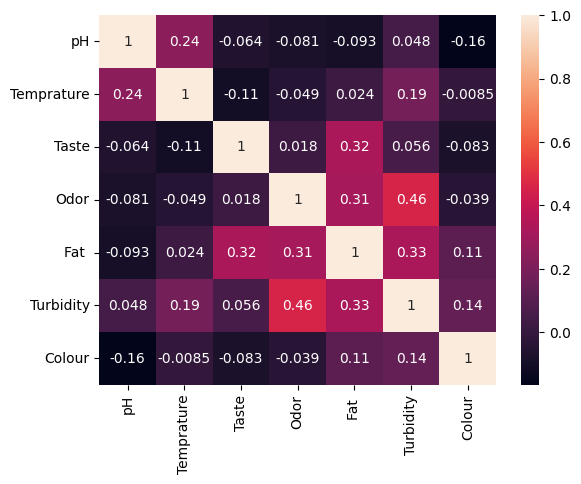

In [17]:
sns.heatmap(data.corr(), annot=True)

### Pre Modelling

In [18]:
x = data.drop(columns='Grade')
y = data['Grade']

In [19]:
x.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
0,6.6,35,1,0,1,0,254
1,6.6,36,0,1,0,1,253
2,8.5,70,1,1,1,1,246
3,9.5,34,1,1,0,1,255
4,6.6,37,0,0,0,0,255


In [20]:
y

0         high
1         high
2          low
3          low
4       medium
         ...  
1054    medium
1055      high
1056       low
1057      high
1058       low
Name: Grade, Length: 1059, dtype: object

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [23]:
x_train.shape, x_test.shape

((847, 7), (212, 7))

### Modelling

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [25]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)

DecisionTreeClassifier()

In [26]:
y_pred = dtree.predict(x_test)

In [28]:
accuracy_score(y_pred, y_test)

0.9905660377358491

In [44]:
print('Training set score: {:.4f}'.format(dtree.score(x_train, y_train)))
print('Test set score: {:.4f}'.format(dtree.score(x_test, y_test)))

Training set score: 1.0000
Test set score: 0.9906


In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [31]:
y_predRf = rf.predict(x_test)
accuracy_score(y_predRf, y_test)

0.9952830188679245

In [45]:
print('Training set score: {:.4f}'.format(rf.score(x_train, y_train)))
print('Test set score: {:.4f}'.format(rf.score(x_test, y_test)))

Training set score: 1.0000
Test set score: 0.9953


In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [34]:
y_predlr = logreg.predict(x_test)
accuracy_score(y_predlr, y_test)

0.7452830188679245

In [46]:
print('Training set score: {:.4f}'.format(logreg.score(x_train, y_train)))
print('Test set score: {:.4f}'.format(logreg.score(x_test, y_test)))

Training set score: 0.7698
Test set score: 0.7453


In [35]:
from sklearn.naive_bayes import GaussianNB

In [36]:
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

In [38]:
y_prednb = nb.predict(x_test)

In [40]:
accuracy_score(y_prednb, y_test)

0.9433962264150944

In [47]:
print('Training set score: {:.4f}'.format(nb.score(x_train, y_train)))
print('Test set score: {:.4f}'.format(nb.score(x_test, y_test)))

Training set score: 0.9469
Test set score: 0.9434


In [50]:
print(classification_report(y_prednb, y_test))

              precision    recall  f1-score   support

        high       1.00      0.80      0.89        60
         low       0.95      1.00      0.97        74
      medium       0.91      1.00      0.95        78

    accuracy                           0.94       212
   macro avg       0.95      0.93      0.94       212
weighted avg       0.95      0.94      0.94       212



In [51]:
confusion_matrix(y_prednb, y_test)

array([[48,  4,  8],
       [ 0, 74,  0],
       [ 0,  0, 78]], dtype=int64)

In [41]:
from sklearn.svm import SVC

In [42]:
svm = SVC()
svm.fit(x_train, y_train)

SVC()

In [43]:
y_predsvm = svm.predict(x_test)
accuracy_score(y_predsvm, y_test)

0.5660377358490566

In [48]:
print('Training set score: {:.4f}'.format(svm.score(x_train, y_train)))
print('Test set score: {:.4f}'.format(svm.score(x_test, y_test)))

Training set score: 0.5124
Test set score: 0.5660


### Simple Predict

In [54]:
prediksi = nb.predict(np.array([[7.2, 72, 0, 1, 0, 1, 245]]))
prediksi

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but GaussianNB was fitted with feature names



array(['low'], dtype='<U6')

In [59]:
prediksi1 = nb.predict(np.array([[6.7, 45, 1, 0, 1, 1, 253]]))
prediksi1

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but GaussianNB was fitted with feature names



array(['high'], dtype='<U6')